In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Extract Data
data = pd.read_csv(r"C:\Users\Madhuri\OneDrive\Documents\projectum1\Financial Analytics data.csv",encoding="utf-8")
data

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN
...,...,...,...,...,...
483,496,Lak. Vilas Bank,3029.57,790.17,NaN
484,497,NOCIL,3026.26,249.27,NaN
485,498,Orient Cement,3024.32,511.53,NaN
486,499,Natl.Fertilizer,3017.07,2840.75,NaN


In [3]:
data.shape

(488, 5)

In [4]:
data.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB


Data Cleaning

In [6]:
#check the missing values
missing_values = data.isnull().sum()
print("Missing values :\n", missing_values)

Missing values :
 S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
Unnamed: 4           394
dtype: int64


In [7]:
#drop unrelated/blank columns
data.drop(['Unnamed: 4'],axis=1,inplace=True)

In [8]:
#check for null values
pd.isnull(data).sum()

S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
dtype: int64

In [9]:
#drop null values
data.dropna(inplace=True)

In [10]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
data.describe()

,S.No.,Mar Cap - Crore,Sales Qtr - Crore
count,365.000000,365.000000,365.000000
mean,250.435616,31300.970301,4395.976849
std,147.106354,67224.641338,11092.206185
min,1.000000,3017.070000,47.240000
25%,133.000000,5089.870000,593.740000
50%,264.000000,9097.330000,1278.300000
75%,363.000000,21372.180000,2840.750000
max,499.000000,583436.720000,110666.930000


Exploratory Data Analysis

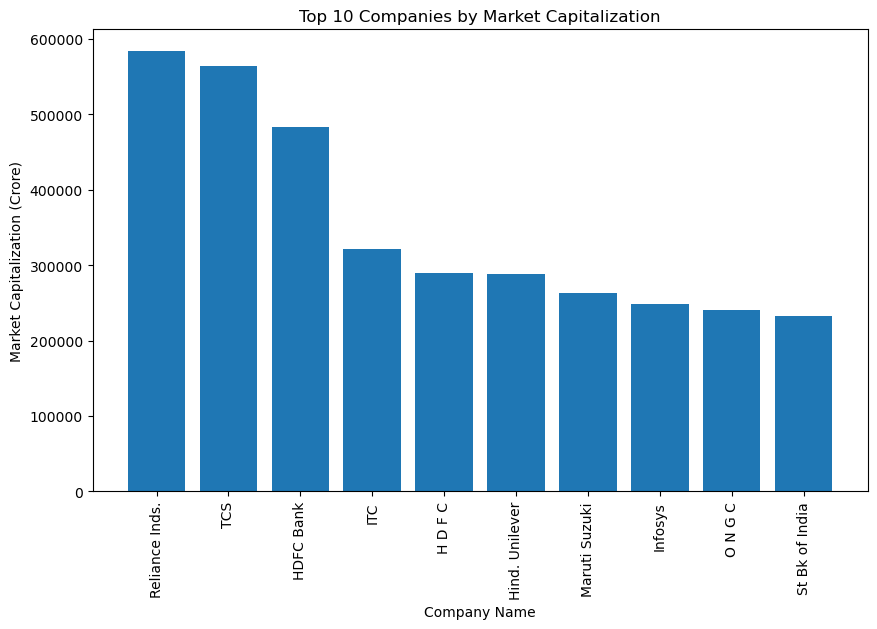

In [12]:
# Top Companies by Market Cap
top_market_cap = data.sort_values(by='Mar Cap - Crore', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_market_cap['Name'], top_market_cap['Mar Cap - Crore'])
plt.xticks(rotation=90)
plt.title('Top 10 Companies by Market Capitalization')
plt.xlabel('Company Name')
plt.ylabel('Market Capitalization (Crore)')
plt.show()

Reliance Industries has the highest market capitalization.
Tata Consultancy Services (TCS) follows closely behind.

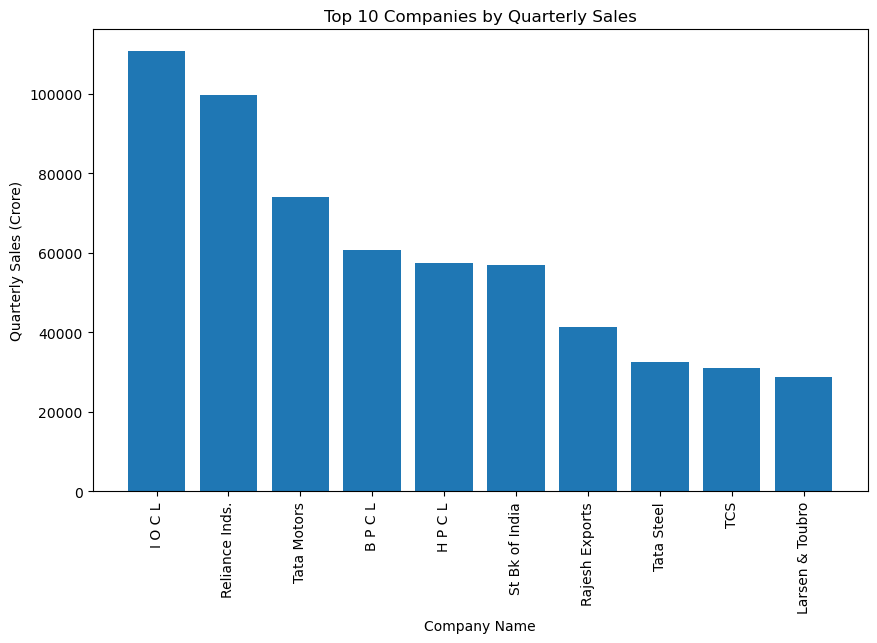

In [13]:
# Top Companies by Quarterly Sales
top_sales = data.sort_values(by='Sales Qtr - Crore', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_sales['Name'], top_sales['Sales Qtr - Crore'])
plt.xticks(rotation=90)
plt.title('Top 10 Companies by Quarterly Sales')
plt.xlabel('Company Name')
plt.ylabel('Quarterly Sales (Crore)')
plt.show()

IOCL and Reliance Industries are the top performers in terms of quarterly sales, each exceeding 100,000 Crores.

In [15]:
# Calculate Market Cap to Sales Ratio
data['Market Cap to Sales Ratio'] = data['Mar Cap - Crore'] / data['Sales Qtr - Crore']

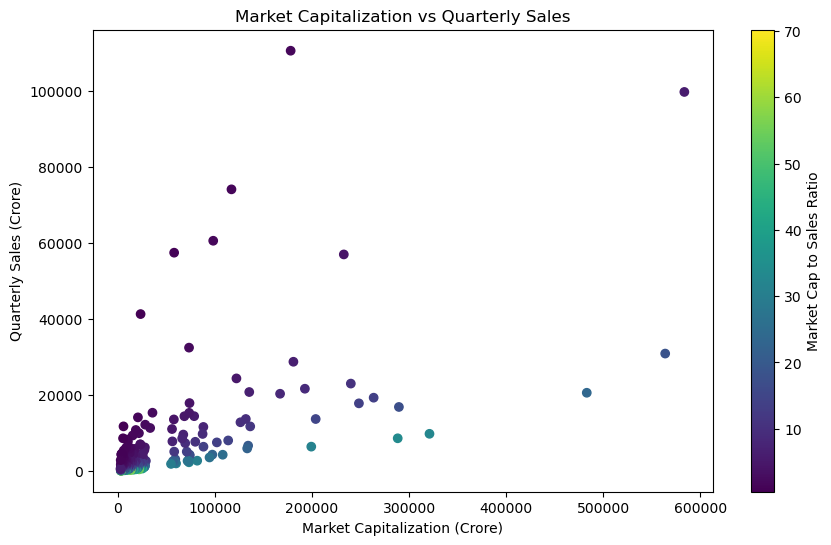

In [16]:
# Scatter Plot: Market Cap vs Sales
plt.figure(figsize=(10, 6))
plt.scatter(data['Mar Cap - Crore'], data['Sales Qtr - Crore'], c=data['Market Cap to Sales Ratio'], cmap='viridis')
plt.colorbar(label='Market Cap to Sales Ratio')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Quarterly Sales (Crore)')
plt.title('Market Capitalization vs Quarterly Sales')
plt.show()

There is a positive correlation between Market Capitalization and Quarterly Sales.
Most companies have lower Market Cap and Sales, with a few significant outliers.
The Market Cap to Sales Ratio is higher for companies with lower Market Capitalization and Quarterly Sales.

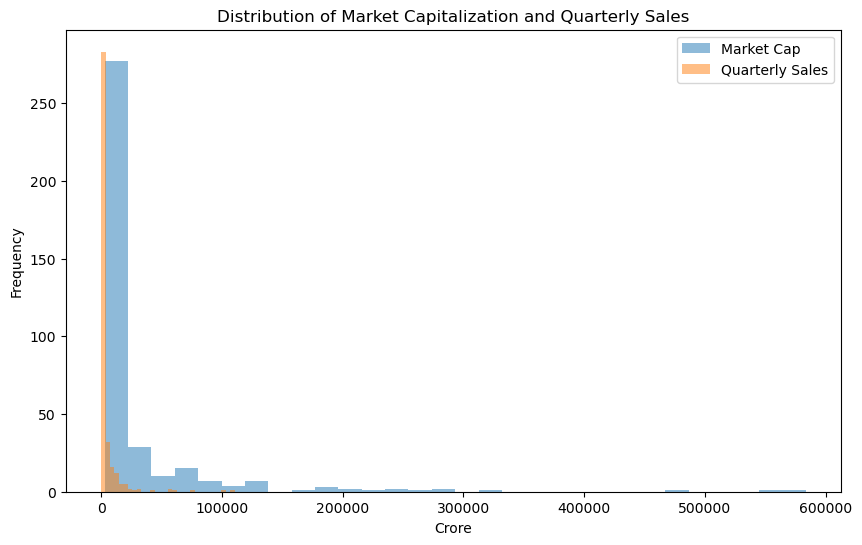

In [17]:
# Distribution of Market Cap and Sales
plt.figure(figsize=(10, 6))
plt.hist(data['Mar Cap - Crore'], bins=30, alpha=0.5, label='Market Cap')
plt.hist(data['Sales Qtr - Crore'], bins=30, alpha=0.5, label='Quarterly Sales')
plt.legend(loc='upper right')
plt.title('Distribution of Market Capitalization and Quarterly Sales')
plt.xlabel('Crore')
plt.ylabel('Frequency')
plt.show()

Most companies have low market cap and sales.
A few companies dominate with high values.
Market structure shows many small firms with a few large ones.

Conclusion : IOCL and Reliance Industries are the top performers in terms of quarterly sales, each exceeding 100,000 Crores.
Reliance Industries has the highest market capitalization.Tata Consultancy Services (TCS) follows closely behind.